In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [4]:
script_dir = os.path.dirname(os.path.abspath(os.getcwd()))
file_path = os.path.join(script_dir, "raw_datasets", "flood.xlsx")
df = pd.read_excel(file_path)

In [5]:
df.shape

(4129, 46)

In [6]:
df

,DisNo.,Historic,Classification Key,Disaster Group,Disaster Subgroup,Disaster Type,Disaster Subtype,External IDs,Event Name,ISO,...,Reconstruction Costs ('000 US$),"Reconstruction Costs, Adjusted ('000 US$)",Insured Damage ('000 US$),"Insured Damage, Adjusted ('000 US$)",Total Damage ('000 US$),"Total Damage, Adjusted ('000 US$)",CPI,Admin Units,Entry Date,Last Update
0,2000-0002-AGO,No,nat-hyd-flo-riv,Natural,Hydrological,Flood,Riverine flood,NaN,NaN,AGO,...,NaN,NaN,NaN,NaN,10000.0,17695.0,56.514291,"[{""adm2_code"":4214,""adm2_name"":""Baia Farta""},{...",2005-02-03,2023-09-25
1,2000-0012-MOZ,No,nat-hyd-flo-riv,Natural,Hydrological,Flood,Riverine flood,NaN,NaN,MOZ,...,NaN,NaN,1500.0,2654.0,419200.0,741759.0,56.514291,"[{""adm1_code"":2114,""adm1_name"":""Inhambane""},{""...",2005-09-16,2023-09-25
2,2000-0019-BRA,No,nat-hyd-flo-riv,Natural,Hydrological,Flood,Riverine flood,NaN,NaN,BRA,...,NaN,NaN,NaN,NaN,NaN,NaN,56.514291,"[{""adm2_code"":8467,""adm2_name"":""Pirangucu""},{""...",2005-07-08,2023-09-25
3,2000-0038-PHL,No,nat-hyd-flo-fla,Natural,Hydrological,Flood,Flash flood,NaN,NaN,PHL,...,NaN,NaN,NaN,NaN,4080.0,7219.0,56.514291,"[{""adm2_code"":24275,""adm2_name"":""Agusan Del No...",2004-10-27,2023-09-25
4,2000-0043-ZAF,No,nat-hyd-flo-riv,Natural,Hydrological,Flood,Riverine flood,NaN,NaN,ZAF,...,NaN,NaN,50000.0,88473.0,160000.0,283114.0,56.514291,"[{""adm1_code"":2708,""adm1_name"":""Gauteng""},{""ad...",2005-09-16,2023-09-25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4124,2025-0116-MYS,No,nat-hyd-flo-flo,Natural,Hydrological,Flood,Flood (General),NaN,NaN,MYS,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2025-02-21,2025-02-28
4125,2025-0127-AFG,No,nat-hyd-flo-fla,Natural,Hydrological,Flood,Flash flood,NaN,NaN,AFG,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2025-02-26,2025-02-27
4126,2025-0128-MDG,No,nat-hyd-flo-flo,Natural,Hydrological,Flood,Flood (General),NaN,NaN,MDG,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2025-02-26,2025-02-28
4127,2025-0138-PER,No,nat-hyd-flo-flo,Natural,Hydrological,Flood,Flood (General),GLIDE:FL-2025-000022,NaN,PER,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2025-02-27,2025-03-04


In [7]:
df.rename(columns={df.columns[0]: 'Year'}, inplace=True)
required_columns = ['Year', 'Disaster Type', 'Country', 'Location', 'Total Affected', 'Magnitude']
df = df[required_columns]

In [8]:
df

,Year,Disaster Type,Country,Location,Total Affected,Magnitude
0,2000-0002-AGO,Flood,Angola,"Dombre Grande village (Baia Farta district, Be...",70000.0,47000.0
1,2000-0012-MOZ,Flood,Mozambique,"Matutuine, Manhica, Magude, Marracuene distric...",4500000.0,1980.0
2,2000-0019-BRA,Flood,Brazil,"Rio de Janeiro city (Rio de Janeiro district, ...",70000.0,350000.0
3,2000-0038-PHL,Flood,Philippines,"Agusan del Sur, Agusan del Norte, Surigao del ...",153885.0,16700.0
4,2000-0043-ZAF,Flood,South Africa,"Mpumalanga, KwaZulu-Natal, Gauteng provinces",200.0,NaN
...,...,...,...,...,...,...
4124,2025-0116-MYS,Flood,Malaysia,Pahang and Negeri Sembilan states,251.0,NaN
4125,2025-0127-AFG,Flood,Afghanistan,Farah region; Pushtkoh district; Kandahar prov...,44.0,NaN
4126,2025-0128-MDG,Flood,Madagascar,Analamanga region,NaN,NaN
4127,2025-0138-PER,Flood,Peru,Huancavelica,57000.0,NaN


In [9]:
df['Year'] = df['Year'].astype(str).str[:4]
df['Location'] = df['Location'].str.split(',').str[0]

/var/folders/0p/vdvp33851vn1jcfb8t3_kyzm0000gn/T/ipykernel_64709/4287316212.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Year'] = df['Year'].astype(str).str[:4]
/var/folders/0p/vdvp33851vn1jcfb8t3_kyzm0000gn/T/ipykernel_64709/4287316212.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Location'] = df['Location'].str.split(',').str[0]


In [10]:
df

,Year,Disaster Type,Country,Location,Total Affected,Magnitude
0,2000,Flood,Angola,Dombre Grande village (Baia Farta district,70000.0,47000.0
1,2000,Flood,Mozambique,Matutuine,4500000.0,1980.0
2,2000,Flood,Brazil,Rio de Janeiro city (Rio de Janeiro district,70000.0,350000.0
3,2000,Flood,Philippines,Agusan del Sur,153885.0,16700.0
4,2000,Flood,South Africa,Mpumalanga,200.0,NaN
...,...,...,...,...,...,...
4124,2025,Flood,Malaysia,Pahang and Negeri Sembilan states,251.0,NaN
4125,2025,Flood,Afghanistan,Farah region; Pushtkoh district; Kandahar prov...,44.0,NaN
4126,2025,Flood,Madagascar,Analamanga region,NaN,NaN
4127,2025,Flood,Peru,Huancavelica,57000.0,NaN


In [11]:
df.isnull().sum()

Year                 0
Disaster Type        0
Country              0
Location            23
Total Affected     419
Magnitude         2734
dtype: int64

<Axes: xlabel='Magnitude'>

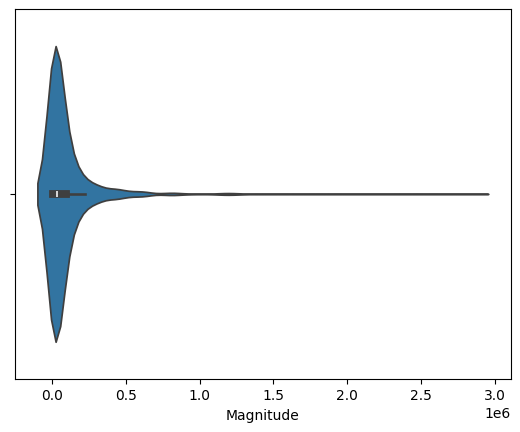

In [15]:
sns.violinplot(x = 'Magnitude', data = df)

In [20]:
df

,Year,Disaster Type,Country,Location,Total Affected,Magnitude
0,2000,Flood,Angola,Dombre Grande village (Baia Farta district,70000.0,47000.0
1,2000,Flood,Mozambique,Matutuine,4500000.0,1980.0
2,2000,Flood,Brazil,Rio de Janeiro city (Rio de Janeiro district,70000.0,350000.0
3,2000,Flood,Philippines,Agusan del Sur,153885.0,16700.0
4,2000,Flood,South Africa,Mpumalanga,200.0,NaN
...,...,...,...,...,...,...
4124,2025,Flood,Malaysia,Pahang and Negeri Sembilan states,251.0,NaN
4125,2025,Flood,Afghanistan,Farah region; Pushtkoh district; Kandahar prov...,44.0,NaN
4126,2025,Flood,Madagascar,Analamanga region,NaN,NaN
4127,2025,Flood,Peru,Huancavelica,57000.0,NaN


In [21]:
df_min = df['Magnitude'].min()

df['Magnitude'] = df['Magnitude'].apply(
    lambda x: round(np.random.uniform(df_min, 100000), 1) if pd.isna(x) else x
)

/var/folders/0p/vdvp33851vn1jcfb8t3_kyzm0000gn/T/ipykernel_64709/773988139.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Magnitude'] = df['Magnitude'].apply(


In [23]:
df.isnull().sum()

Year                0
Disaster Type       0
Country             0
Location           23
Total Affected    419
Magnitude           0
dtype: int64

In [24]:
df['Location'].fillna(df['Location'].mode()[0], inplace=True)
df['Total Affected'].fillna(df['Total Affected'].mode()[0], inplace=True)

/var/folders/0p/vdvp33851vn1jcfb8t3_kyzm0000gn/T/ipykernel_64709/4170441267.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Location'].fillna(df['Location'].mode()[0], inplace=True)
/var/folders/0p/vdvp33851vn1jcfb8t3_kyzm0000gn/T/ipykernel_64709/4170441267.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Location'].fillna(df['L

In [25]:
df.isnull().sum()

Year              0
Disaster Type     0
Country           0
Location          0
Total Affected    0
Magnitude         0
dtype: int64

In [26]:
df.head()

,Year,Disaster Type,Country,Location,Total Affected,Magnitude
0,2000,Flood,Angola,Dombre Grande village (Baia Farta district,70000.0,47000.0
1,2000,Flood,Mozambique,Matutuine,4500000.0,1980.0
2,2000,Flood,Brazil,Rio de Janeiro city (Rio de Janeiro district,70000.0,350000.0
3,2000,Flood,Philippines,Agusan del Sur,153885.0,16700.0
4,2000,Flood,South Africa,Mpumalanga,200.0,40476.7


In [27]:
df.to_csv("flood_cleaned.csv", index=False)